**DNA Expression Microarray**

DNA (Deoxyribonucleid acid) microarrays measure the expression of a gene in a cell by measuring the amount of mRNA (messenger ribonucleic acid) present for that gene. Microarrays are considered a breakthrough technology in biology, facilitating the quantitative study of thousand of genes simultaneously from a single sample of cells. 

Here is how it works: The nucleotide sequences for a few thousand genes are printed on a glass slide. A target sample and a reference sample are labeled with red and green dyes, and each are hybridized with the DNA on the slide. Through flouroscopy, the log (red/green) intensities of RNA hybridizing at each site is measured. The result is a few thousand numbers, ranging from [-6, 6] 
measuring the expression level of each gene in the target relative to the reference sample. Positive values indicate hiigher expression and the negative vlaues low expressions. 

A gene expression dataset collects together the expression values from a series of DNA microarray experiements, with each column representing an experiement. 
There are several thousand rows representing individual genes, and tens of columns representing samples. 
- ~ 6830 genes (rows) and 64 samples (columns) although for clarity only a random sample of 100 rows shown.
- dataset as a heat map, ranging from green (negative) to red (positive) 
- the samples are 64 cancer tumors from different patients 

The challenge here is to understand how the genes and samples are organized. 
- a. which samples are most similar to each other - in terms of expression profiles across genes? 
- b. which genes are most similar to each other, in terms of expression profiles across samples 
- c. do certain genes show very high (or low) expression for certain cancer samples? 

We could view this a supervising or unsupervising learning problem. 

As a supervising problem, it is a gression problem, with two categorical predictive variables - genes, and samples, and the output/response being the level of expression. 

In [ ]:
""" Heatmap a 3-dimensional chart that crosses two dimensions and aggregates
the values to the intersection of the horizontal and vertical. The value that
falls into the intersection is mapped into a color in a palette by default 
We need data source for the chart, x for x-axis, y for y-axis, and values to
produe histogram for table like input  
values = Dimension['values']
dimension = ['x','y', 'values']
regular_dimensions = [['x', 'y',]
                      ['x','y', 'values']]
""" 

In [ ]:
!head gene-expression.csv

In [ ]:
!head SRP070849.tsv

Gene	SRR3189679	SRR3189680	SRR3189681	SRR3189682	SRR3189683	SRR3189684	SRR3189685	SRR3189686	SRR3189687	SRR3189688	SRR3189689	SRR3189690	SRR3189691	SRR3189692	SRR3189693	SRR3189694	SRR3189695	SRR3189696	SRR3189697
ENSMUSG00000000001	15.66237711687108	14.020691522659178	15.555237673496261	12.530302692282373	30.260702375583335	21.88635065028355	16.977009602480425	15.910324818470475	13.964012082070788	20.33431464623326	11.648719268394112	15.173052205499708	23.691736532165294	25.125880334091683	17.408527565474127	19.02174771396133	14.434415861472182	17.99931013234367	15.49715624364096
ENSMUSG00000000003	0.02856262247307973	0.036579343067061135	0.4199643937629119	0.02197858667796524	0.07553235662558486	0.06415830328198455	0.05491574472671929	0.03367995078795199	0.04635835972417437	0.058367917476556674	0.033989725803229946	0.06048005710517845	0.12508106103339464	0.07963392007249298	0.05026406735185754	0.06219031607641433	0.04609207853053203	0.055518277200405995	0.08376849618676617
ENSMUSG000

In [ ]:
gene_expression_dataframe = pd.read_csv('SRP070849.tsv', delimiter='\t')

In [ ]:
gene_expression_dataframe,

(                    SRR3189679  SRR3189680  ...  SRR3189696  SRR3189697
 Gene                                        ...                        
 ENSMUSG00000000001   15.662377   14.020692  ...   17.999310   15.497156
 ENSMUSG00000000003    0.028563    0.036579  ...    0.055518    0.083768
 ENSMUSG00000000028    5.150481    7.498046  ...    8.560792    6.990834
 ENSMUSG00000000031    0.923775    0.622761  ...    0.348850    0.083768
 ENSMUSG00000000037    2.947676    3.047156  ...    2.887687    3.211649
 ...                        ...         ...  ...         ...         ...
 ENSMUSG00000118387    0.028563    0.036579  ...    0.055518    0.083768
 ENSMUSG00000118388    0.028563    0.036579  ...    0.055518    0.083768
 ENSMUSG00000118390    0.694095    0.613301  ...    0.566410    0.977389
 ENSMUSG00000118391    1.015229    1.171583  ...    1.824098    0.929017
 ENSMUSG00000118392    0.401886    0.036579  ...    0.362730    0.083768
 
 [41249 rows x 19 columns],)

In [ ]:
metadata_ = pd.read_csv('metadata_SRP070849.tsv', delimiter='\t')

In [ ]:
metadata_,

(   refinebio_accession_code  ... refinebio_treatment
 0                SRR3189679  ...                none
 1                SRR3189680  ...                none
 2                SRR3189681  ...                none
 3                SRR3189682  ...                none
 4                SRR3189683  ...             vehicle
 5                SRR3189684  ...             vehicle
 6                SRR3189685  ...             vehicle
 7                SRR3189686  ...              ag-221
 8                SRR3189687  ...              ag-221
 9                SRR3189688  ...              ag-221
 10               SRR3189689  ...              ag-221
 11               SRR3189690  ...             vehicle
 12               SRR3189691  ...             vehicle
 13               SRR3189692  ...             vehicle
 14               SRR3189693  ...             vehicle
 15               SRR3189694  ...               5-aza
 16               SRR3189695  ...               5-aza
 17               SRR3189696

In [ ]:
metadata_['refinebio_title']

0                  WT-1 RNA-Seq
1                  WT-2 RNA-Seq
2                  WT-3 RNA-Seq
3                  WT-4 RNA-Seq
4       IDH2.FLT3_veh_1 RNA-Seq
5       IDH2.FLT3_veh_2 RNA-Seq
6       IDH2.FLT3_veh_3 RNA-Seq
7     IDH2.FLT3_ag221_1 RNA-Seq
8     IDH2.FLT3_ag221_2 RNA-Seq
9     IDH2.FLT3_ag221_3 RNA-Seq
10    IDH2.FLT3_ag221_4 RNA-Seq
11      TET2.FLT3_veh_1 RNA-Seq
12      TET2.FLT3_veh_2 RNA-Seq
13      TET2.FLT3_veh_3 RNA-Seq
14      TET2.FLT3_veh_4 RNA-Seq
15     TET2.FLT3_azaC_1 RNA-Seq
16     TET2.FLT3_azaC_2 RNA-Seq
17     TET2.FLT3_azaC_3 RNA-Seq
18     TET2.FLT3_azaC_4 RNA-Seq
Name: refinebio_title, dtype: object

In [ ]:
metadata_['refinebio_accession_code'].tolist()

['SRR3189679',
 'SRR3189680',
 'SRR3189681',
 'SRR3189682',
 'SRR3189683',
 'SRR3189684',
 'SRR3189685',
 'SRR3189686',
 'SRR3189687',
 'SRR3189688',
 'SRR3189689',
 'SRR3189690',
 'SRR3189691',
 'SRR3189692',
 'SRR3189693',
 'SRR3189694',
 'SRR3189695',
 'SRR3189696',
 'SRR3189697']

In [ ]:
gene_expression_dataframe.set_index('Gene', inplace=True)

In [ ]:
gene_expression_dataframe.columns

Index(['SRR3189679', 'SRR3189680', 'SRR3189681', 'SRR3189682', 'SRR3189683',
       'SRR3189684', 'SRR3189685', 'SRR3189686', 'SRR3189687', 'SRR3189688',
       'SRR3189689', 'SRR3189690', 'SRR3189691', 'SRR3189692', 'SRR3189693',
       'SRR3189694', 'SRR3189695', 'SRR3189696', 'SRR3189697'],
      dtype='object')

In [ ]:
gene_expression_dataframe.columns.tolist() == metadata_['refinebio_accession_code'].tolist()

True

In [ ]:
""" calculate variance for each gene """ 
gene_expression_dataframe.var(axis=1, skipna=True)

Gene
ENSMUSG00000000001    22.243722
ENSMUSG00000000003     0.007514
ENSMUSG00000000028     3.795262
ENSMUSG00000000031     0.450196
ENSMUSG00000000037     0.256104
                        ...    
ENSMUSG00000118387     0.018745
ENSMUSG00000118388     0.000581
ENSMUSG00000118390     0.046556
ENSMUSG00000118391     0.144691
ENSMUSG00000118392     0.055267
Length: 41249, dtype: float64

In [ ]:
gene_expression_dataframe['variance'] = gene_expression_dataframe.var(axis=1, skipna=True)

In [ ]:
gene_expression_dataframe.variance > 0.9

Gene
ENSMUSG00000000001     True
ENSMUSG00000000003    False
ENSMUSG00000000028     True
ENSMUSG00000000031    False
ENSMUSG00000000037    False
                      ...  
ENSMUSG00000118387    False
ENSMUSG00000118388    False
ENSMUSG00000118390    False
ENSMUSG00000118391    False
ENSMUSG00000118392    False
Name: variance, Length: 41249, dtype: bool

In [ ]:
""" find upper quartile for these data """ 
upper_quantile = gene_expression_dataframe['variance'].quantile([0.92]).values
upper_quantile

array([9.00404445])

In [ ]:
""" filter data whose only genes are in quantile 
41429,
 3300 rows 
""" 
dataframe_by_variance = gene_expression_dataframe[
    gene_expression_dataframe.variance > float(upper_quantile)]
dataframe_by_variance, 

(                    SRR3189679  SRR3189680  ...  SRR3189697   variance
 Gene                                        ...                       
 ENSMUSG00000000001   15.662377   14.020692  ...   15.497156  22.243722
 ENSMUSG00000000078    9.047701    9.747571  ...    5.252032  26.802848
 ENSMUSG00000000088    9.237976    8.073521  ...   18.138422  53.802688
 ENSMUSG00000000131   10.659723   11.497412  ...    8.578218  10.489976
 ENSMUSG00000000171   26.795223   25.827309  ...   33.782628  30.153591
 ...                        ...         ...  ...         ...        ...
 ENSMUSG00000117465   10.812538   13.151585  ...    6.318107  18.798146
 ENSMUSG00000117748    4.615136    4.752540  ...    5.407958  16.157861
 ENSMUSG00000117869   17.340081   13.922076  ...   22.342768  24.259373
 ENSMUSG00000117924   15.606114   16.767278  ...   22.312398  34.709908
 ENSMUSG00000118012    4.428607    5.855119  ...    2.820364  20.370498
 
 [3300 rows x 20 columns],)

In [ ]:
""" drop the variance column we calculated """ 
dataframe_by_variance = dataframe_by_variance.drop(columns="variance")
dataframe_by_variance, 

(                    SRR3189679  SRR3189680  ...  SRR3189696  SRR3189697
 Gene                                        ...                        
 ENSMUSG00000000001   15.662377   14.020692  ...   17.999310   15.497156
 ENSMUSG00000000078    9.047701    9.747571  ...   10.992601    5.252032
 ENSMUSG00000000088    9.237976    8.073521  ...   10.382590   18.138422
 ENSMUSG00000000131   10.659723   11.497412  ...    9.626273    8.578218
 ENSMUSG00000000171   26.795223   25.827309  ...   34.032497   33.782628
 ...                        ...         ...  ...         ...         ...
 ENSMUSG00000117465   10.812538   13.151585  ...    5.436774    6.318107
 ENSMUSG00000117748    4.615136    4.752540  ...    5.326743    5.407958
 ENSMUSG00000117869   17.340081   13.922076  ...   14.755023   22.342768
 ENSMUSG00000117924   15.606114   16.767278  ...   17.156014   22.312398
 ENSMUSG00000118012    4.428607    5.855119  ...    5.259400    2.820364
 
 [3300 rows x 19 columns],)

In [ ]:
""" write top variance in a tsv file """ 
dataframe_by_variance.to_csv('top_100_var_genes.tsv', sep='\t')

In [ ]:
""" prepara the metadata for annotation """ 
expression_gene_group = metadata_['refinebio_title'].str.split(
    '-|\\.', expand=True, n=1)
# IDH2.FLT3_ag221_4 RNA-Seq
metadata_['exp_group'] = expression_gene_group[0]
metadata_['exp_group']

0       WT
1       WT
2       WT
3       WT
4     IDH2
5     IDH2
6     IDH2
7     IDH2
8     IDH2
9     IDH2
10    IDH2
11    TET2
12    TET2
13    TET2
14    TET2
15    TET2
16    TET2
17    TET2
18    TET2
Name: exp_group, dtype: object

In [ ]:
""" color there two variables """ 
refinebio_treatment = metadata_['refinebio_treatment']
exp_group = metadata_['exp_group']


In [ ]:
from matplotlib.patches import Patch
import random 
def make_color_key(variable):
  num_colors = len(variable.unique())
  colors = [
      '#' + ''.join([random.choice('0123456789ABCDEF') for i in range(6)])
      for j in range(num_colors)
  ]
  # make color key dictionary for these groups 
  color_key_dict = dict(zip(variable.unique(), colors))
  # make into data frame where index is sample ID
  color_key = pd.Series(variable.map(color_key_dict))
  return {'color_key_dict': color_key_dict, 
          'color_key': color_key}

In [ ]:
variable_ = metadata_['refinebio_accession_code']
make_color_key(variable_)

{'color_key_dict': {'SRR3189679': '#A93C43',
  'SRR3189680': '#AE2C11',
  'SRR3189681': '#E6C9E7',
  'SRR3189682': '#B36B8A',
  'SRR3189683': '#B0D95B',
  'SRR3189684': '#51BEA4',
  'SRR3189685': '#C3D257',
  'SRR3189686': '#07597B',
  'SRR3189687': '#EBC27B',
  'SRR3189688': '#48DE8C',
  'SRR3189689': '#C03770',
  'SRR3189690': '#5DFF49',
  'SRR3189691': '#715232',
  'SRR3189692': '#057B23',
  'SRR3189693': '#B6D1DF',
  'SRR3189694': '#881318',
  'SRR3189695': '#A5576C',
  'SRR3189696': '#4B2483',
  'SRR3189697': '#B90750'},
 'color_key': 0     #A93C43
 1     #AE2C11
 2     #E6C9E7
 3     #B36B8A
 4     #B0D95B
 5     #51BEA4
 6     #C3D257
 7     #07597B
 8     #EBC27B
 9     #48DE8C
 10    #C03770
 11    #5DFF49
 12    #715232
 13    #057B23
 14    #B6D1DF
 15    #881318
 16    #A5576C
 17    #4B2483
 18    #B90750
 Name: refinebio_accession_code, dtype: object}

In [ ]:
def make_legend(color_key_dict):
  # setup based on color dictionary
  return [Patch(facecolor=color_key_dict[name]) for name in color_key_dict]

In [ ]:
""" color there two variables """ 
refinebio_treatment_colors = make_color_key(metadata_['refinebio_treatment'])
exp_group_colors = make_color_key(metadata_['exp_group'])

In [ ]:
exp_group_colors

{'color_key_dict': {'WT': '#DE1429', 'IDH2': '#369239', 'TET2': '#092D57'},
 'color_key': 0     #DE1429
 1     #DE1429
 2     #DE1429
 3     #DE1429
 4     #369239
 5     #369239
 6     #369239
 7     #369239
 8     #369239
 9     #369239
 10    #369239
 11    #092D57
 12    #092D57
 13    #092D57
 14    #092D57
 15    #092D57
 16    #092D57
 17    #092D57
 18    #092D57
 Name: exp_group, dtype: object}

In [ ]:
refinebio_treatment_colors

{'color_key_dict': {'none': '#E45BEF',
  'vehicle': '#9DA691',
  'ag-221': '#709103',
  '5-aza': '#219D84'},
 'color_key': 0     #E45BEF
 1     #E45BEF
 2     #E45BEF
 3     #E45BEF
 4     #9DA691
 5     #9DA691
 6     #9DA691
 7     #709103
 8     #709103
 9     #709103
 10    #709103
 11    #9DA691
 12    #9DA691
 13    #9DA691
 14    #9DA691
 15    #219D84
 16    #219D84
 17    #219D84
 18    #219D84
 Name: refinebio_treatment, dtype: object}

In [ ]:
""" make them into one data frame to provide as input to the heatmap """ 
color_key_dataframe = pd.concat(
    [#metadata_['refinebio_accession_code'], 
     refinebio_treatment_colors['color_key'], 
     exp_group_colors['color_key']],
    axis=1,
    names=['treatment', 'exp_group']
)
color_key_dataframe = color_key_dataframe.set_index(dataframe_by_variance.columns)
color_key_dataframe, 

(           refinebio_treatment exp_group
 SRR3189679             #E45BEF   #DE1429
 SRR3189680             #E45BEF   #DE1429
 SRR3189681             #E45BEF   #DE1429
 SRR3189682             #E45BEF   #DE1429
 SRR3189683             #9DA691   #369239
 SRR3189684             #9DA691   #369239
 SRR3189685             #9DA691   #369239
 SRR3189686             #709103   #369239
 SRR3189687             #709103   #369239
 SRR3189688             #709103   #369239
 SRR3189689             #709103   #369239
 SRR3189690             #9DA691   #092D57
 SRR3189691             #9DA691   #092D57
 SRR3189692             #9DA691   #092D57
 SRR3189693             #9DA691   #092D57
 SRR3189694             #219D84   #092D57
 SRR3189695             #219D84   #092D57
 SRR3189696             #219D84   #092D57
 SRR3189697             #219D84   #092D57,)

/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


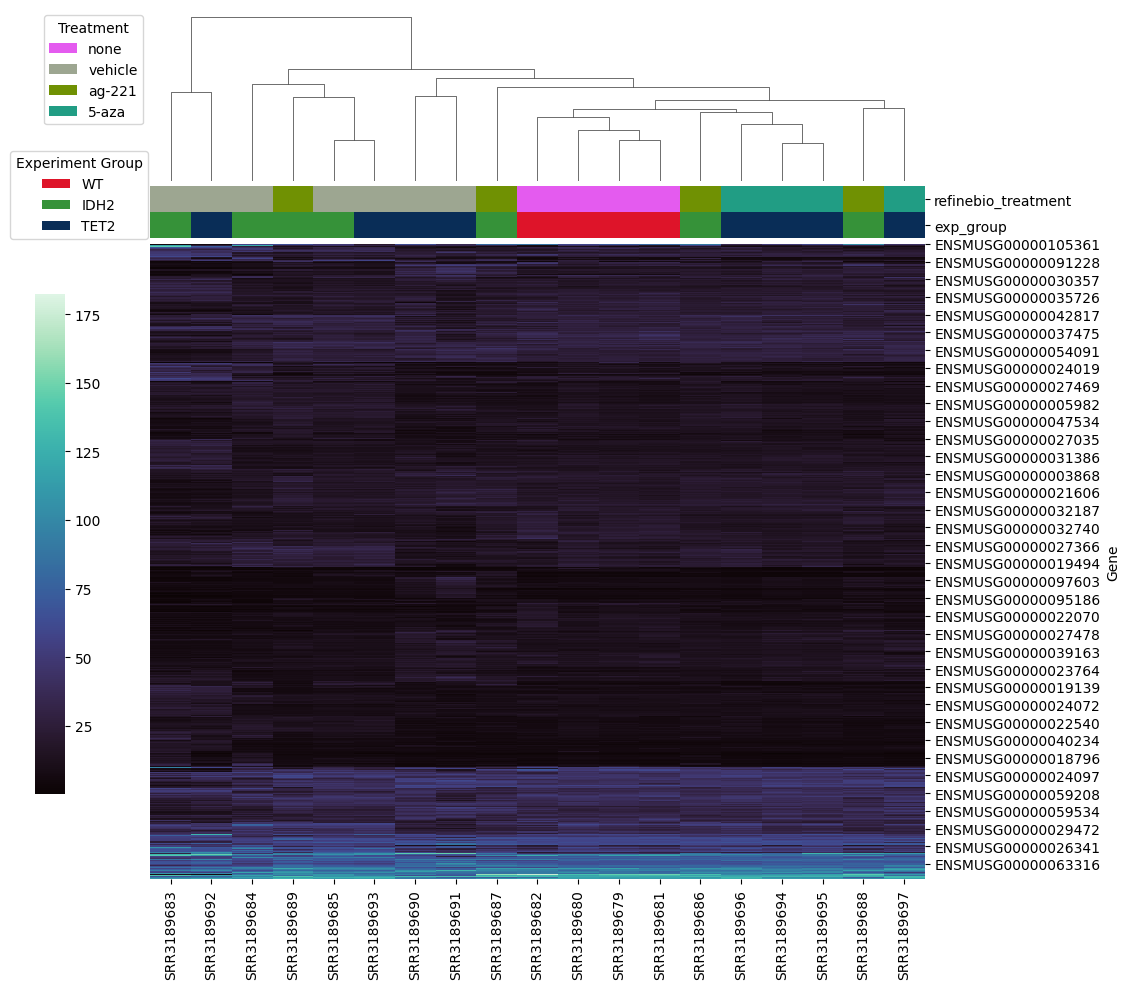

In [ ]:
""" create and store heatmap - start with seaborn """
import seaborn as sns

heatmap = sns.clustermap(
    dataframe_by_variance, cmap='mako', 
    col_colors=color_key_dataframe,
    dendrogram_ratio=(0, 0.2),
    cbar_pos=(-0.1, 0.2, 0.03, 0.5)
)

legend1 = make_legend(exp_group_colors['color_key_dict'])
legend2 = make_legend(refinebio_treatment_colors['color_key_dict'])

from matplotlib import pyplot as plt
plt.legend(
    legend1, 
    exp_group_colors['color_key_dict'],
    title='Experiment Group',
    bbox_to_anchor=(4, 1.3),
)

heatmap.ax_row_dendrogram.legend(
    legend2, 
    refinebio_treatment_colors['color_key_dict'],
    title='Treatment',
    bbox_to_anchor=(0, 1.37),
)

plt.show()

### NCI microarray Gene Expression Understanding 

NCI microarray data (chap 14)

Source and reference:

http://genome-www.stanford.edu/nci60/

NCI microarray data
 
6830 genes
missing values have been imputed via SVD
64 cell lines, labels are below

Data can be read in R via commands:
nci.data <- read.table(url("https://web.stanford.edu/~hastie/ElemStatLearn/datasets/nci.data.csv"),
	sep=",",row.names=1,header=TRUE)
nci.label <-scan(url("https://web.stanford.edu/~hastie/ElemStatLearn/datasets/nci.label",what="")


In [ ]:
from matplotlib import gridspec, transforms
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm 
import numpy as np, pandas as pd 
%matplotlib inline 

In [ ]:
dataset_genes = pd.read_csv('nci_data.csv', sep=',')
labels = pd.read_csv('nci_label.txt', names=['type'])

In [ ]:
dataset_genes.head(2), labels.head(3)

(  Unnamed: 0    s1        s2    s3    s4     s5    s6    s7    s8    s9  ...  \
 0         g1  0.30  0.679961  0.94  0.28  0.485  0.31 -0.83 -0.19  0.46  ...   
 1         g2  1.18  1.289961 -0.04 -0.31 -0.465 -0.03  0.00 -0.87  0.00  ...   
 
     s55   s56   s57      s58   s59   s60   s61   s62   s63   s64  
 0  0.01 -0.62 -0.38  0.04998  0.65 -0.03 -0.27  0.21 -0.05  0.35  
 1 -1.28 -0.13  0.00 -0.72002  0.64 -0.48  0.63 -0.62  0.14 -0.27  
 
 [2 rows x 65 columns],
   CNS          
 0   CNS        
 1   CNS        
 2   RENAL      )

In [ ]:
labels['type'] = labels['type'].str.strip()
labels.type

0          CNS
1          CNS
2          CNS
3        RENAL
4       BREAST
        ...   
59    MELANOMA
60    MELANOMA
61    MELANOMA
62    MELANOMA
63    MELANOMA
Name: type, Length: 64, dtype: object

In [ ]:
labels_group = labels.copy() # keep the same structure 
labels_group.loc[labels_group['type'] == 'K562A-repro', 'type'] = 'K562'
labels_group.loc[labels_group['type'] == 'K562B-repro', 'type'] = 'K562'
labels_group.loc[labels_group['type'] == 'MCF7A-repro', 'type'] = 'MCF7'
labels_group.loc[labels_group['type'] == 'MCF7D-repro', 'type'] = 'MCF7'

sample_columns = [f's{i+1}' for i in range(64)]
sample_columns[:4], dataset_genes['s4']

(['s1', 's2', 's3', 's4'],
 0       0.28000
 1      -0.31000
 2       0.68000
 3      -0.81000
 4       0.62500
          ...   
 6825   -0.30000
 6826   -1.15001
 6827    1.09000
 6828   -0.26000
 6829   -1.10000
 Name: s4, Length: 6830, dtype: float64)

In [ ]:
X = dataset_genes[sample_columns].values 
y = labels['type'].values 
y_grouped = labels_group['type'].values 
X, y, y_grouped

(array([[ 0.3     ,  0.679961,  0.94    , ...,  0.21    , -0.05    ,
          0.35    ],
        [ 1.18    ,  1.289961, -0.04    , ..., -0.62    ,  0.14    ,
         -0.27    ],
        [ 0.55    ,  0.169961, -0.17    , ..., -0.15    , -0.09    ,
          0.02    ],
        ...,
        [ 0.28    , -0.770039, -0.12    , ...,  0.16    , -0.49    ,
          0.29    ],
        [-0.34    , -0.390039, -0.41    , ...,  2.03    ,  0.01    ,
         -0.15    ],
        [-1.93    , -2.000039,  0.      , ...,  3.94    , -1.72    ,
          1.21    ]]),
 array(['CNS', 'CNS', 'CNS', 'RENAL', 'BREAST', 'CNS', 'CNS', 'BREAST',
        'NSCLC', 'NSCLC', 'RENAL', 'RENAL', 'RENAL', 'RENAL', 'RENAL',
        'RENAL', 'RENAL', 'BREAST', 'NSCLC', 'RENAL', 'UNKNOWN', 'OVARIAN',
        'MELANOMA', 'PROSTATE', 'OVARIAN', 'OVARIAN', 'OVARIAN', 'OVARIAN',
        'OVARIAN', 'PROSTATE', 'NSCLC', 'NSCLC', 'NSCLC', 'LEUKEMIA',
        'K562B-repro', 'K562A-repro', 'LEUKEMIA', 'LEUKEMIA', 'LEUKEMIA',
      

In [ ]:
""" Heatmap a 3-dimensional chart that crosses two dimensions and aggregates
the values to the intersection of the horizontal and vertical. 
values = Dimension['values']
dimension = ['x','y', 'values']
""" 
cmap = LinearSegmentedColormap.from_list(
    'cm', ['green', 'black', 'red'], N=256)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams['lines.linewidth'] = 0.5
bounds = np.arange(-2, 2.5, .5)
# bounds array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ])
norm = BoundaryNorm(bounds, cmap.N)
random_rows = np.random.choice(range(X.shape[0]), 100, replace=False)
random_columns = np.random.choice(range(X.shape[1]), X.shape[1], replace=False)
random_data_for_heatmap = X[random_rows][:, random_columns]
random_data_for_heatmap.shape, random_data_for_heatmap

((100, 64),
 array([[ 0.0075    ,  1.5275    ,  0.6975    , ...,  0.3275    ,
         -0.372539  ,  1.1975    ],
        [ 0.58      ,  0.56      ,  0.04      , ...,  0.2       ,
         -0.300039  ,  0.53      ],
        [-0.25      ,  0.5       ,  0.21      , ..., -0.5       ,
          0.289961  ,  0.31      ],
        ...,
        [ 0.        , -0.02500977, -3.71501   , ..., -0.7350098 ,
         -0.06504875, -1.94501   ],
        [ 1.29998   ,  0.9599805 , -1.71002   , ...,  3.34998   ,
          1.429941  ,  2.23998   ],
        [ 0.8399805 ,  2.92998   , -1.64002   , ...,  0.        ,
          0.        ,  0.        ]]))

[Text(0, 0, 'MELANOMA'),
 Text(1, 0, 'NSCLC'),
 Text(2, 0, 'NSCLC'),
 Text(3, 0, 'MELANOMA'),
 Text(4, 0, 'NSCLC'),
 Text(5, 0, 'NSCLC'),
 Text(6, 0, 'LEUKEMIA'),
 Text(7, 0, 'RENAL'),
 Text(8, 0, 'BREAST'),
 Text(9, 0, 'PROSTATE'),
 Text(10, 0, 'NSCLC'),
 Text(11, 0, 'COLON'),
 Text(12, 0, 'RENAL'),
 Text(13, 0, 'MELANOMA'),
 Text(14, 0, 'PROSTATE'),
 Text(15, 0, 'BREAST'),
 Text(16, 0, 'CNS'),
 Text(17, 0, 'BREAST'),
 Text(18, 0, 'NSCLC'),
 Text(19, 0, 'LEUKEMIA'),
 Text(20, 0, 'COLON'),
 Text(21, 0, 'COLON'),
 Text(22, 0, 'MELANOMA'),
 Text(23, 0, 'LEUKEMIA'),
 Text(24, 0, 'CNS'),
 Text(25, 0, 'LEUKEMIA'),
 Text(26, 0, 'CNS'),
 Text(27, 0, 'OVARIAN'),
 Text(28, 0, 'NSCLC'),
 Text(29, 0, 'CNS'),
 Text(30, 0, 'OVARIAN'),
 Text(31, 0, 'MELANOMA'),
 Text(32, 0, 'RENAL'),
 Text(33, 0, 'NSCLC'),
 Text(34, 0, 'RENAL'),
 Text(35, 0, 'COLON'),
 Text(36, 0, 'NSCLC'),
 Text(37, 0, 'BREAST'),
 Text(38, 0, 'OVARIAN'),
 Text(39, 0, 'COLON'),
 Text(40, 0, 'RENAL'),
 Text(41, 0, 'COLON'),
 Text(42,

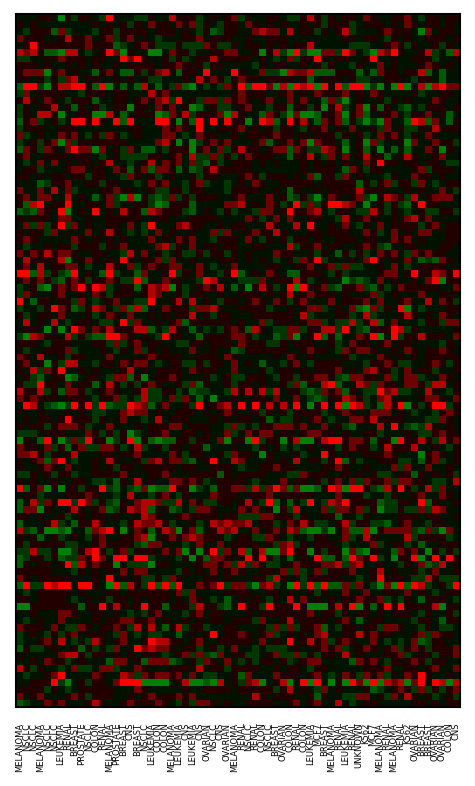

In [ ]:
figure, axis = plt.subplots(figsize=(15, 6), dpi=150)
axis.imshow(random_data_for_heatmap, interpolation='none', norm=norm, cmap=cmap)
axis.tick_params(bottom=False, left=False, labelleft=False)
plt.setp(axis, xticks=list(range(64)))
axis.set_xticklabels(y_grouped[random_columns], rotation=90, ha='center', size=4)

In [ ]:
""" Clustering """ 
from sklearn.cluster import KMeans
from collections import Counter 
number_of_clusters = 4 
kmeans_ = KMeans(n_clusters=number_of_clusters, random_state=1).fit(X.T)
clusters = kmeans_.predict(X.T) 
cls_counts = [Counter(y_grouped[clusters == c]) for c in range(4)]
cls_counts

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[Counter({'LEUKEMIA': 6, 'K562': 2}),
 Counter({'MELANOMA': 7, 'BREAST': 2}),
 Counter({'CNS': 5,
          'RENAL': 9,
          'BREAST': 3,
          'NSCLC': 3,
          'UNKNOWN': 1,
          'OVARIAN': 1,
          'MELANOMA': 1}),
 Counter({'PROSTATE': 2,
          'OVARIAN': 5,
          'NSCLC': 6,
          'COLON': 7,
          'MCF7': 2,
          'BREAST': 2})]

In [ ]:
for group_cluster in [['BREAST', 'CNS', 'COLON', 'K562', 'LEUKEMIA', 'MCF7'],
                      ['OVARIAN', 'NSCLC', 'PROSTATE', 'UNKNOWN']]:
              print('-'*80)
              print('Cluster | ' + ''.join(
                  [f'{cluster_name:>10}' for cluster_name in group_cluster]))
              print('-'*80)
              for i in range(number_of_clusters):
                counts_ = cls_counts[i]
                cnts_ = [counts_[t] if t in counts_ else 0 for t in group_cluster ]
                print(cnts_, counts_)

--------------------------------------------------------------------------------
Cluster |     BREAST       CNS     COLON      K562  LEUKEMIA      MCF7
--------------------------------------------------------------------------------
[0, 0, 0, 2, 6, 0] Counter({'LEUKEMIA': 6, 'K562': 2})
[2, 0, 0, 0, 0, 0] Counter({'MELANOMA': 7, 'BREAST': 2})
[3, 5, 0, 0, 0, 0] Counter({'RENAL': 9, 'CNS': 5, 'BREAST': 3, 'NSCLC': 3, 'UNKNOWN': 1, 'OVARIAN': 1, 'MELANOMA': 1})
[2, 0, 7, 0, 0, 2] Counter({'COLON': 7, 'NSCLC': 6, 'OVARIAN': 5, 'PROSTATE': 2, 'MCF7': 2, 'BREAST': 2})
--------------------------------------------------------------------------------
Cluster |    OVARIAN     NSCLC  PROSTATE   UNKNOWN
--------------------------------------------------------------------------------
[0, 0, 0, 0] Counter({'LEUKEMIA': 6, 'K562': 2})
[0, 0, 0, 0] Counter({'MELANOMA': 7, 'BREAST': 2})
[1, 3, 0, 1] Counter({'RENAL': 9, 'CNS': 5, 'BREAST': 3, 'NSCLC': 3, 'UNKNOWN': 1, 'OVARIAN': 1, 'MELANOMA': 1})
[5, 

In [ ]:
for group_cluster in [['BREAST', 'CNS', 'COLON', 'K562', 'LEUKEMIA', 'MCF7'],
                      ['OVARIAN', 'NSCLC', 'PROSTATE', 'UNKNOWN']]:
              print('-'*80)
              print('Cluster | ' + ''.join(
                  [f'{cluster_name:>10}' for cluster_name in group_cluster]))
              print('-'*80)
              for i in range(number_of_clusters):
                counts_ = cls_counts[i]
                cnts_ = [counts_[t] if t in counts_ else 0 for t in group_cluster ]
                print(f'{i+1:<10}' + ''.join([f'{idx:>10}' for idx in cnts_]))

--------------------------------------------------------------------------------
Cluster |     BREAST       CNS     COLON      K562  LEUKEMIA      MCF7
--------------------------------------------------------------------------------
1                  0         0         0         2         6         0
2                  2         0         0         0         0         0
3                  3         5         0         0         0         0
4                  2         0         7         0         0         2
--------------------------------------------------------------------------------
Cluster |    OVARIAN     NSCLC  PROSTATE   UNKNOWN
--------------------------------------------------------------------------------
1                  0         0         0         0
2                  0         0         0         0
3                  1         3         0         1
4                  5         6         2         0


In [ ]:
"""
Review notes: Computational Biology - Clustering as Prediction
Supervised vs. Unsupervised Learning
• Hierarchical Clustering
– Hierarchical Agglomerative Clustering (HAC)
• Non-Hierarchical Clustering – K-means
– Mixtures of Gaussians and EM-Algorithm
""" 

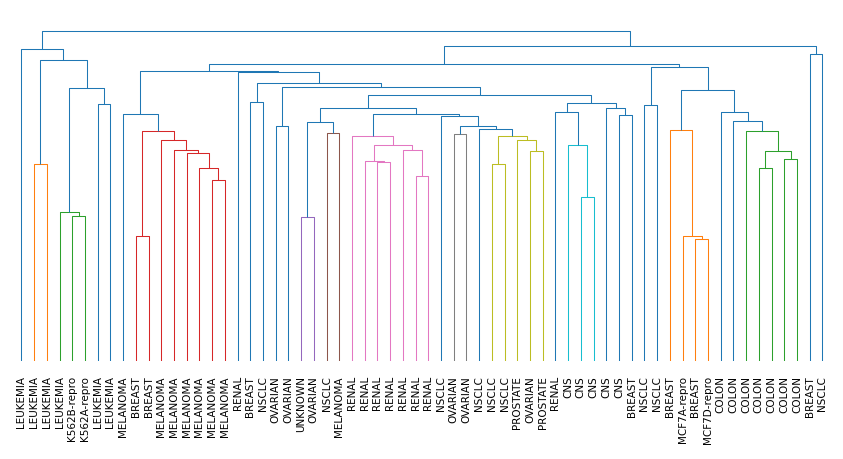

In [ ]:
""" Hierarchical Clustering  
book page 522 
Dendogram from agglomerative hierarchical clustering with average lineage to 
human tumor microarray data 
""" 
from scipy.cluster.hierarchy import linkage, dendrogram

link_ = linkage(X.T, method='average')
figure, axis = plt.subplots(figsize=(7, 3), dpi=150)
_= dendrogram(link_, labels=y, leaf_font_size=5)
axis.tick_params(bottom=False, left=False, labelleft=False)
for s in axis.spines.values():
  s.set_visible(False)

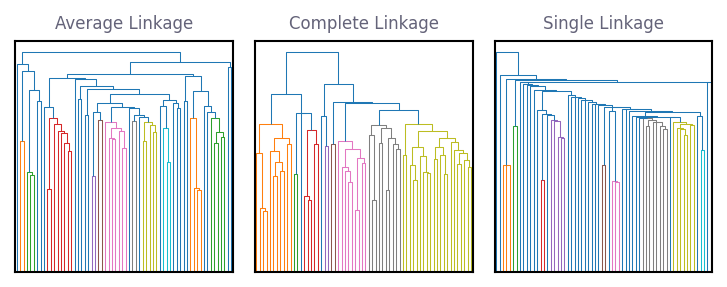

In [ ]:
""" Hierarchical Clustering  
book page 524
Dendogram from agglomerative hierarchical clustering of human tumor microarray 
data 
""" 
figure, axarr = plt.subplots(1, 3, figsize=(6, 2), dpi=150)
plt.subplots_adjust(wspace=0.1)
titles = {
    'average': 'Average Linkage',
    'complete': 'Complete Linkage', 
    'single': 'Single Linkage'
}
plt.rcParams['lines.linewidth'] = 0.5
for i, diagram in enumerate(['average', 'complete', 'single']):
  ax = axarr[i] 
  plt.axes(ax)
  link__ = linkage(X.T, method=diagram)
  _ = dendrogram(link__, labels=y)
  ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
  plt.title(titles[diagram], color=gray__, fontsize=8)

<ipython-input-250-0c249ab57836>:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gridspec_[0, 0])


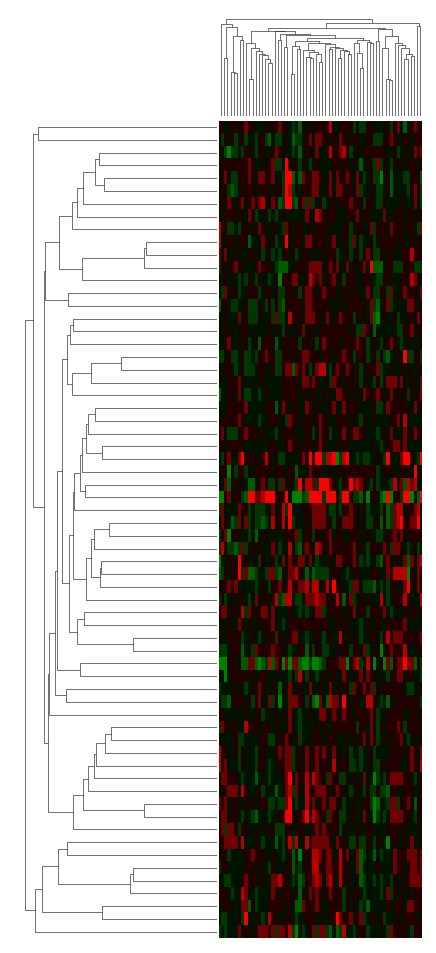

In [ ]:
""" 
Page 527 Final graph - Figure 14.14 of DNA Microarray data

In this instance of DNA microarray data, the average linkage of hierarchical 
clustering has been applied independently to the rows (individual genes) and 
to columns (samples). 
Same criteria for the color range with green for positive/over-represented,
and red for negative/under-represented. 
"""
fig_, axarr = plt.subplots(figsize=(3.5, 8), dpi=150)
plt.rcParams['lines.linewidth'] = 0.3
gridspec_ = gridspec.GridSpec(
    2, 2, 
    width_ratios=[1, 1],
    height_ratios=[1, 8]
)
ax1 = plt.subplot(gridspec_[0, 0])
ax2 = plt.subplot(gridspec_[0, 1])
ax3 = plt.subplot(gridspec_[1, 0])
ax4 = plt.subplot(gridspec_[1, 1])

axarr = [ax1, ax2, ax3, ax4]
plt.subplots_adjust(wspace=0.01, hspace=0.01)

plt.axes(ax2)
link_top = linkage(X.T, method='average')
diagram_top = dendrogram(link_top, 
                         above_threshold_color=gray_,color_threshold=0)

plt.axes(ax3)
link_left = linkage(X.T, method='average')
diagram_left = dendrogram(link_left, orientation='left', 
                          above_threshold_color=gray_,color_threshold=0)

data = X[np.array(diagram_left['leaves'])][:, np.array(diagram_top['leaves'])]
ax4.set_xlim(0, 60)
ax4.imshow(data, interpolation='none', norm=norm, cmap=cmap, aspect='auto')

for ax in axarr:
  ax.tick_params(
      bottom=False, labelbottom=False, left=False, labelleft=False, 
      top=False, labeltop=False, right=False, labelright=False
  )
  for s in ax.spines.values():
    s.set_visible(False)
  

<ipython-input-252-11a0e16cce7b>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gridspec_[0, 0])


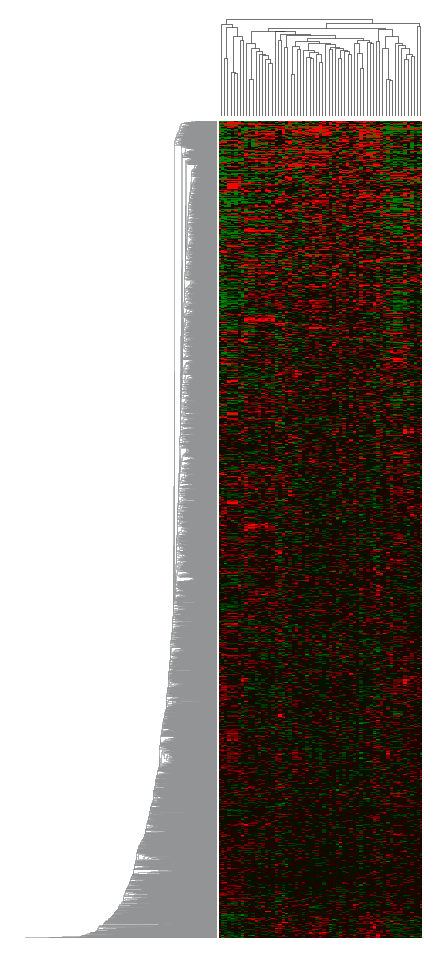

In [ ]:
fig_, axarr = plt.subplots(figsize=(3.5, 8), dpi=150)
plt.rcParams['lines.linewidth'] = 0.3
gridspec_ = gridspec.GridSpec(
    2, 2, 
    width_ratios=[1, 1],
    height_ratios=[1, 8]
)
ax1 = plt.subplot(gridspec_[0, 0])
ax2 = plt.subplot(gridspec_[0, 1])
ax3 = plt.subplot(gridspec_[1, 0])
ax4 = plt.subplot(gridspec_[1, 1])

axarr = [ax1, ax2, ax3, ax4]
plt.subplots_adjust(wspace=0.01, hspace=0.01)

plt.axes(ax2)
link_top = linkage(X.T, method='average')
diagram_top = dendrogram(link_top, 
                         above_threshold_color=gray_,color_threshold=0)

plt.axes(ax3)
link_left = linkage(X, method='average')
diagram_left = dendrogram(link_left, orientation='left', 
                          above_threshold_color=gray___,color_threshold=0)

data = X[np.array(diagram_left['leaves'])][:, np.array(diagram_top['leaves'])]
ax4.set_xlim(0, 60)
ax4.imshow(data, interpolation='none', norm=norm, cmap=cmap, aspect='auto')

for ax in axarr:
  ax.tick_params(
      bottom=False, labelbottom=False, left=False, labelleft=False, 
      top=False, labeltop=False, right=False, labelright=False
  )
  for s in ax.spines.values():
    s.set_visible(False)
  

##Statistics

**gene expression data**

In [ ]:
import pandas as pd 
names_ = ['Gene', 'SRR3189679', 'SRR3189680', 'SRR3189681', 'SRR3189682', 
          'SRR3189683', 'SRR3189684', 'SRR3189685', 'SRR3189686', 'SRR3189687',
          'SRR3189688', 'SRR3189689', 'SRR3189690', 'SRR3189691', 'SRR3189692',
          'SRR3189693', 'SRR3189694', 'SRR3189695', 'SRR3189696', 'SRR3189697']
dataset_gene_expr = pd.read_csv('SRP070849.tsv', delimiter='\t') #names = names_
dataset_gene_expr

,Gene,SRR3189679,SRR3189680,SRR3189681,SRR3189682,SRR3189683,SRR3189684,SRR3189685,SRR3189686,SRR3189687,SRR3189688,SRR3189689,SRR3189690,SRR3189691,SRR3189692,SRR3189693,SRR3189694,SRR3189695,SRR3189696,SRR3189697
0,ENSMUSG00000000001,15.662377,14.020692,15.555238,12.530303,30.260702,21.886351,16.977010,15.910325,13.964012,20.334315,11.648719,15.173052,23.691737,25.125880,17.408528,19.021748,14.434416,17.999310,15.497156
1,ENSMUSG00000000003,0.028563,0.036579,0.419964,0.021979,0.075532,0.064158,0.054916,0.033680,0.046358,0.058368,0.033990,0.060480,0.125081,0.079634,0.050264,0.062190,0.046092,0.055518,0.083768
2,ENSMUSG00000000028,5.150481,7.498046,5.717152,5.034920,11.635079,12.077084,8.502686,7.605635,5.431773,7.401169,9.781360,9.532716,8.701792,7.958705,8.861361,8.829696,7.839187,8.560792,6.990834
3,ENSMUSG00000000031,0.923775,0.622761,0.037410,0.418679,0.075532,0.064158,1.384295,0.497883,0.046358,1.242944,0.511846,0.803937,2.510960,1.560483,1.424694,0.062190,0.754587,0.348850,0.083768
4,ENSMUSG00000000037,2.947676,3.047156,2.851992,3.006278,4.073379,3.221718,2.847645,2.720893,2.668958,3.995019,2.276475,3.380865,2.523756,3.932793,3.816612,3.075951,3.312766,2.887687,3.211649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41244,ENSMUSG00000118387,0.028563,0.036579,0.037410,0.545115,0.075532,0.064158,0.054916,0.033680,0.046358,0.058368,0.033990,0.060480,0.125081,0.079634,0.050264,0.414283,0.046092,0.055518,0.083768
41245,ENSMUSG00000118388,0.028563,0.036579,0.037410,0.021979,0.075532,0.064158,0.054916,0.033680,0.046358,0.058368,0.033990,0.060480,0.125081,0.079634,0.050264,0.062190,0.046092,0.055518,0.083768
41246,ENSMUSG00000118390,0.694095,0.613301,0.831701,1.092258,0.649014,0.458885,0.644600,0.496239,0.902704,0.637620,0.825115,0.610644,0.125081,0.673132,0.439781,0.609502,0.533151,0.566410,0.977389
41247,ENSMUSG00000118391,1.015229,1.171583,1.530382,1.563850,0.568318,0.744747,0.693702,0.960289,1.131056,1.728656,0.916347,1.220731,1.136218,0.964927,0.458746,1.181139,0.681706,1.824098,0.929017


In [ ]:
names_ng = ['SRR3189679', 'SRR3189680', 'SRR3189681', 'SRR3189682', 
          'SRR3189683', 'SRR3189684', 'SRR3189685', 'SRR3189686', 'SRR3189687',
          'SRR3189688', 'SRR3189689', 'SRR3189690', 'SRR3189691', 'SRR3189692',
          'SRR3189693', 'SRR3189694', 'SRR3189695', 'SRR3189696', 'SRR3189697']
X = dataset_gene_expr[names_ng].values
X

array([[15.66, 14.02, 15.56, ..., 14.43, 18.  , 15.5 ],
       [ 0.03,  0.04,  0.42, ...,  0.05,  0.06,  0.08],
       [ 5.15,  7.5 ,  5.72, ...,  7.84,  8.56,  6.99],
       ...,
       [ 0.69,  0.61,  0.83, ...,  0.53,  0.57,  0.98],
       [ 1.02,  1.17,  1.53, ...,  0.68,  1.82,  0.93],
       [ 0.4 ,  0.04,  0.04, ...,  0.05,  0.36,  0.08]])

In [ ]:
""" Variance, Covariance, Correlation matrix """
dataset_gene_expr[names_].corr()

,SRR3189679,SRR3189680,SRR3189681,SRR3189682,SRR3189683,SRR3189684,SRR3189685,SRR3189686,SRR3189687,SRR3189688,SRR3189689,SRR3189690,SRR3189691,SRR3189692,SRR3189693,SRR3189694,SRR3189695,SRR3189696,SRR3189697
SRR3189679,1.000000,0.986128,0.988487,0.980019,0.820784,0.894157,0.952177,0.971846,0.948197,0.963674,0.935533,0.940309,0.898082,0.853935,0.938979,0.970394,0.971194,0.971859,0.953690
SRR3189680,0.986128,1.000000,0.978864,0.956104,0.833933,0.924243,0.968158,0.977668,0.935011,0.943015,0.951046,0.940803,0.889599,0.862744,0.956343,0.969705,0.975607,0.977542,0.945857
SRR3189681,0.988487,0.978864,1.000000,0.978590,0.809735,0.874354,0.940391,0.961176,0.938466,0.965053,0.917985,0.944023,0.888255,0.846114,0.924730,0.972133,0.972664,0.964409,0.950870
SRR3189682,0.980019,0.956104,0.978590,1.000000,0.788603,0.848496,0.916839,0.949000,0.948194,0.958864,0.913732,0.918789,0.879620,0.825758,0.904416,0.948506,0.948700,0.944858,0.932364
SRR3189683,0.820784,0.833933,0.809735,0.788603,1.000000,0.888833,0.852959,0.835383,0.789325,0.798977,0.808620,0.786168,0.751448,0.949766,0.840289,0.809216,0.816888,0.826846,0.784587
SRR3189684,0.894157,0.924243,0.874354,0.848496,0.888833,1.000000,0.951121,0.928102,0.863503,0.848860,0.922247,0.848207,0.813578,0.860041,0.945416,0.877150,0.891544,0.915057,0.855589
SRR3189685,0.952177,0.968158,0.940391,0.916839,0.852959,0.951121,1.000000,0.960256,0.927696,0.922730,0.953916,0.926008,0.884862,0.893694,0.988470,0.946429,0.955133,0.970132,0.929398
SRR3189686,0.971846,0.977668,0.961176,0.949000,0.835383,0.928102,0.960256,1.000000,0.961116,0.955412,0.963894,0.939239,0.909144,0.850300,0.946960,0.965641,0.970353,0.972615,0.954963
SRR3189687,0.948197,0.935011,0.938466,0.948194,0.789325,0.863503,0.927696,0.961116,1.000000,0.953985,0.927339,0.933432,0.931543,0.824507,0.911320,0.938453,0.939094,0.927357,0.943040
SRR3189688,0.963674,0.943015,0.965053,0.958864,0.798977,0.848860,0.922730,0.955412,0.953985,1.000000,0.903215,0.961337,0.935275,0.833060,0.901781,0.972052,0.965063,0.948599,0.964679


In [ ]:
np.set_printoptions(precision=2, suppress=True)
np.corrcoef(X, rowvar=False)

array([[1.  , 0.99, 0.99, 0.98, 0.82, 0.89, 0.95, 0.97, 0.95, 0.96, 0.94,
        0.94, 0.9 , 0.85, 0.94, 0.97, 0.97, 0.97, 0.95],
       [0.99, 1.  , 0.98, 0.96, 0.83, 0.92, 0.97, 0.98, 0.94, 0.94, 0.95,
        0.94, 0.89, 0.86, 0.96, 0.97, 0.98, 0.98, 0.95],
       [0.99, 0.98, 1.  , 0.98, 0.81, 0.87, 0.94, 0.96, 0.94, 0.97, 0.92,
        0.94, 0.89, 0.85, 0.92, 0.97, 0.97, 0.96, 0.95],
       [0.98, 0.96, 0.98, 1.  , 0.79, 0.85, 0.92, 0.95, 0.95, 0.96, 0.91,
        0.92, 0.88, 0.83, 0.9 , 0.95, 0.95, 0.94, 0.93],
       [0.82, 0.83, 0.81, 0.79, 1.  , 0.89, 0.85, 0.84, 0.79, 0.8 , 0.81,
        0.79, 0.75, 0.95, 0.84, 0.81, 0.82, 0.83, 0.78],
       [0.89, 0.92, 0.87, 0.85, 0.89, 1.  , 0.95, 0.93, 0.86, 0.85, 0.92,
        0.85, 0.81, 0.86, 0.95, 0.88, 0.89, 0.92, 0.86],
       [0.95, 0.97, 0.94, 0.92, 0.85, 0.95, 1.  , 0.96, 0.93, 0.92, 0.95,
        0.93, 0.88, 0.89, 0.99, 0.95, 0.96, 0.97, 0.93],
       [0.97, 0.98, 0.96, 0.95, 0.84, 0.93, 0.96, 1.  , 0.96, 0.96, 0.96,
        0

In [ ]:
np.cov(X, rowvar=False)

array([[65.2 , 64.3 , 64.45, 63.9 , 53.52, 58.3 , 62.09, 63.37, 61.83,
        62.84, 61.  , 61.31, 58.58, 55.68, 61.22, 63.27, 63.32, 63.37,
        62.19],
       [64.3 , 65.2 , 63.82, 62.34, 54.38, 60.27, 63.13, 63.75, 60.97,
        61.49, 62.01, 61.35, 58.03, 56.26, 62.36, 63.23, 63.61, 63.74,
        61.68],
       [64.45, 63.82, 65.2 , 63.81, 52.8 , 57.01, 61.32, 62.67, 61.19,
        62.93, 59.85, 61.56, 57.94, 55.18, 60.3 , 63.39, 63.42, 62.88,
        62.01],
       [63.9 , 62.34, 63.81, 65.2 , 51.42, 55.33, 59.78, 61.88, 61.82,
        62.52, 59.58, 59.91, 57.37, 53.85, 58.97, 61.85, 61.86, 61.61,
        60.8 ],
       [53.52, 54.38, 52.8 , 51.42, 65.22, 57.96, 55.62, 54.47, 51.47,
        52.1 , 52.73, 51.27, 49.02, 61.94, 54.8 , 52.77, 53.27, 53.92,
        51.17],
       [58.3 , 60.27, 57.01, 55.33, 57.96, 65.21, 62.02, 60.52, 56.31,
        55.35, 60.14, 55.31, 53.07, 56.09, 61.65, 57.2 , 58.14, 59.67,
        55.8 ],
       [62.09, 63.13, 61.32, 59.78, 55.62, 62.02, 65

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)
""" transformed variance-covariance matrix and it should nearly match the 
correlation matrix """  
np.cov(X_transformed, rowvar=False)

array([[1.  , 0.99, 0.99, 0.98, 0.82, 0.89, 0.95, 0.97, 0.95, 0.96, 0.94,
        0.94, 0.9 , 0.85, 0.94, 0.97, 0.97, 0.97, 0.95],
       [0.99, 1.  , 0.98, 0.96, 0.83, 0.92, 0.97, 0.98, 0.94, 0.94, 0.95,
        0.94, 0.89, 0.86, 0.96, 0.97, 0.98, 0.98, 0.95],
       [0.99, 0.98, 1.  , 0.98, 0.81, 0.87, 0.94, 0.96, 0.94, 0.97, 0.92,
        0.94, 0.89, 0.85, 0.92, 0.97, 0.97, 0.96, 0.95],
       [0.98, 0.96, 0.98, 1.  , 0.79, 0.85, 0.92, 0.95, 0.95, 0.96, 0.91,
        0.92, 0.88, 0.83, 0.9 , 0.95, 0.95, 0.94, 0.93],
       [0.82, 0.83, 0.81, 0.79, 1.  , 0.89, 0.85, 0.84, 0.79, 0.8 , 0.81,
        0.79, 0.75, 0.95, 0.84, 0.81, 0.82, 0.83, 0.78],
       [0.89, 0.92, 0.87, 0.85, 0.89, 1.  , 0.95, 0.93, 0.86, 0.85, 0.92,
        0.85, 0.81, 0.86, 0.95, 0.88, 0.89, 0.92, 0.86],
       [0.95, 0.97, 0.94, 0.92, 0.85, 0.95, 1.  , 0.96, 0.93, 0.92, 0.95,
        0.93, 0.88, 0.89, 0.99, 0.95, 0.96, 0.97, 0.93],
       [0.97, 0.98, 0.96, 0.95, 0.84, 0.93, 0.96, 1.  , 0.96, 0.96, 0.96,
        0